In [1]:
# Airline delays dataset cleaning and EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\harsh\\OneDrive\\Desktop\\Data Sets\\airline\\Airlines.csv")

df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [3]:
df.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [4]:
df.dtypes

id              int64
Airline        object
Flight          int64
AirportFrom    object
AirportTo      object
DayOfWeek       int64
Time            int64
Length          int64
Delay           int64
dtype: object

In [5]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.000000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.604461,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.500000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.000000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.500000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df['Length'].describe()

count    539383.000000
mean        132.202007
std          70.117016
min           0.000000
25%          81.000000
50%         115.000000
75%         162.000000
max         655.000000
Name: Length, dtype: float64

In [8]:
df['Time'].describe()

count    539383.000000
mean        802.728963
std         278.045911
min          10.000000
25%         565.000000
50%         795.000000
75%        1035.000000
max        1439.000000
Name: Time, dtype: float64

In [9]:
# Example of confirming flight duration
df[['Airline','AirportFrom', 'AirportTo', 'Length']].head()

,Airline,AirportFrom,AirportTo,Length
0,CO,SFO,IAH,205
1,US,PHX,CLT,222
2,AA,LAX,DFW,165
3,AA,SFO,DFW,195
4,AS,ANC,SEA,202


In [10]:
# Convert 'time' (assume it's minutes past midnight)
df['Departure_Hour'] = df['Time'] // 60  # Get hours
df['Departure_Minute'] = df['Time'] % 60  # Get minutes
df['Departure_Time'] = df['Departure_Hour'].astype(str).str.zfill(2) + ':' + \
                         df['Departure_Minute'].astype(str).str.zfill(2)

# Preview the updated column
df[['Time','Departure_Time']].tail()


,Time,Departure_Time
539378,1439,23:59
539379,1439,23:59
539380,1439,23:59
539381,1439,23:59
539382,1439,23:59


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                539383 non-null  int64 
 1   Airline           539383 non-null  object
 2   Flight            539383 non-null  int64 
 3   AirportFrom       539383 non-null  object
 4   AirportTo         539383 non-null  object
 5   DayOfWeek         539383 non-null  int64 
 6   Time              539383 non-null  int64 
 7   Length            539383 non-null  int64 
 8   Delay             539383 non-null  int64 
 9   Departure_Hour    539383 non-null  int64 
 10  Departure_Minute  539383 non-null  int64 
 11  Departure_Time    539383 non-null  object
dtypes: int64(8), object(4)
memory usage: 49.4+ MB


In [12]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Departure_Hour,Departure_Minute,Departure_Time
0,1,CO,269,SFO,IAH,3,15,205,1,0,15,00:15
1,2,US,1558,PHX,CLT,3,15,222,1,0,15,00:15
2,3,AA,2400,LAX,DFW,3,20,165,1,0,20,00:20
3,4,AA,2466,SFO,DFW,3,20,195,1,0,20,00:20
4,5,AS,108,ANC,SEA,3,30,202,0,0,30,00:30


In [13]:
df.to_csv("C:\\Users\\harsh\\OneDrive\\Desktop\\Data Sets\\airline\\Cleaned_Airlines.csv")

In [14]:
df.shape

(539383, 12)

In [15]:
df['DayOfWeek'].unique()

array([3, 4, 5, 6, 7, 1, 2], dtype=int64)

In [16]:
df['Airline'].unique()

array(['CO', 'US', 'AA', 'AS', 'DL', 'B6', 'HA', 'OO', '9E', 'OH', 'EV',
       'XE', 'YV', 'UA', 'MQ', 'FL', 'F9', 'WN'], dtype=object)

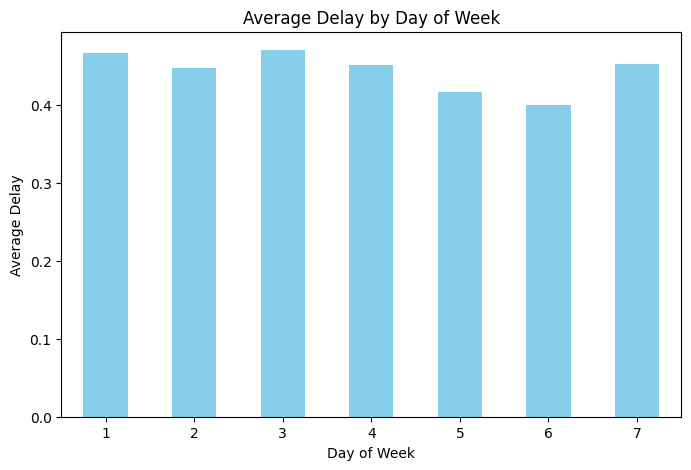

In [17]:
# Group by DayOfWeek and calculate average delay
avg_delay_by_dow = df.groupby('DayOfWeek')['Delay'].mean()

# Plot
plt.figure(figsize=(8, 5))
avg_delay_by_dow.plot(kind='bar', color='skyblue')
plt.title('Average Delay by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Delay')
plt.xticks(rotation=0)
plt.show()



KeyboardInterrupt



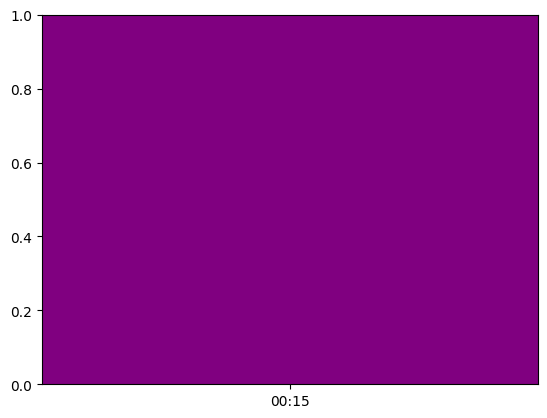

In [19]:
# Plot departure time vs length
plt.bar(df['Departure_Time'], df['Length'], color='purple')
plt.title('Departure Time vs Flight Length')
plt.xlabel('Departure Time')
plt.ylabel('Flight Length (minutes)')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# Group by Departure_Hour and calculate average delay
avg_delay_by_hour = df.groupby('Departure_Hour')['Delay'].mean()

# Plot
avg_delay_by_hour.plot(kind='bar', color='orange')
plt.title('Average Delay by Departure Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Average Delay')
plt.xticks(rotation=0)
plt.show()


CONCLUSION
# NO MISSING VALUES
# NO DUPLICATE VALUES